In [1]:
!git clone https://github.com/justchenhao/BIT_CD.git

Cloning into 'BIT_CD'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (2/2), done.
remote: Total 92 (delta 1), reused 1 (delta 1), pack-reused 90 (from 1)
Receiving objects: 100% (92/92), 57.58 MiB | 45.85 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
%cd BIT_CD

/content/BIT_CD


In [ ]:
!pip install torch torchvision opencv-python matplotlib tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvji

In [ ]:
from google.colab import files
uploaded = files.upload()  # bit.pth dosyasını seç
!mv best_ckpt.pt checkpoints/


Saving best_ckpt.pt to best_ckpt.pt


In [ ]:
!touch /content/BIT_CD/__init__.py
!touch /content/BIT_CD/datasets/__init__.py
!touch /content/BIT_CD/models/__init__.py


In [ ]:
import sys
sys.path.append('/content/BIT_CD')


In [ ]:
!touch /content/BIT_CD/datasets/__init__.py



In [ ]:
!python demo.py


initialize network with normal
cuda:0
process: [np.str_('test_77_0512_0256.png')]
process: [np.str_('test_102_0512_0000.png')]
process: [np.str_('test_121_0768_0256.png')]
process: [np.str_('test_2_0000_0000.png')]
process: [np.str_('test_2_0000_0512.png')]
process: [np.str_('test_7_0256_0512.png')]
process: [np.str_('test_55_0256_0000.png')]
process: [np.str_('1.png')]
process: [np.str_('2.jpg')]


In [1]:
from PIL import Image
import numpy as np
import os

# Yol bilgileri
path_A = "/content/BIT_CD/samples/A/2.jpg"
path_B = "/content/BIT_CD/samples/B/2.jpg"
label_output = "/content/BIT_CD/samples/label/2.png"

# Ortak boyut (modelin kullandığı boyutla aynı olmalı)
target_size = (512, 512)

# Görselleri yükle ve boyutlandır
img_A = Image.open(path_A).convert("RGB").resize(target_size)
img_B = Image.open(path_B).convert("RGB").resize(target_size)

# Numpy'a çevir
np_A = np.array(img_A)
np_B = np.array(img_B)

# Piksel farkı hesapla
diff = np.abs(np_A.astype(np.int16) - np_B.astype(np.int16))
gray_diff = np.max(diff, axis=2)
threshold = 30
label = (gray_diff > threshold).astype(np.uint8) * 255

# Label kaydet
Image.fromarray(label).save(label_output)

print("Label başarıyla oluşturuldu:", label_output)


FileNotFoundError: [Errno 2] No such file or directory: '/content/BIT_CD/samples/A/2.jpg'

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Orijinal görüntüyü yükle (örnek: t2 görüntüsü)
original = Image.open("samples/A/2.jpg").convert("RGB")  # ya da B klasörü de olabilir
original = original.resize((256, 256))  # Mask boyutuna uygun hale getir

# Maskeyi yükle
mask = Image.open("samples/predict/2.png").convert("L")  # grayscale olarak
mask = mask.resize((256, 256))

In [ ]:
# Maskeyi renkli hale getir (örnek: kırmızı alanlar değişiklik)
mask_array = np.array(mask)
color_mask = np.zeros((256, 256, 3), dtype=np.uint8)

# Kırmızı: sadece değişiklik olan yerler (mask == 255 veya 1)
color_mask[mask_array > 128] = [255, 0, 0]  # kırmızı RGB


In [ ]:
# Orijinal ve renkli maskeyi karıştır (alpha blending)
original_array = np.array(original)

overlay = (0.75 * original_array + 0.25 * color_mask).astype(np.uint8)


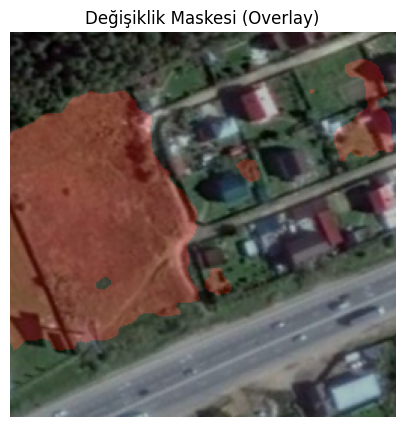

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(overlay)
plt.title("Değişiklik Maskesi (Overlay)")
plt.axis("off")
plt.show()

# Kaydetmek istersen:
Image.fromarray(overlay).save("overlay_result.png")


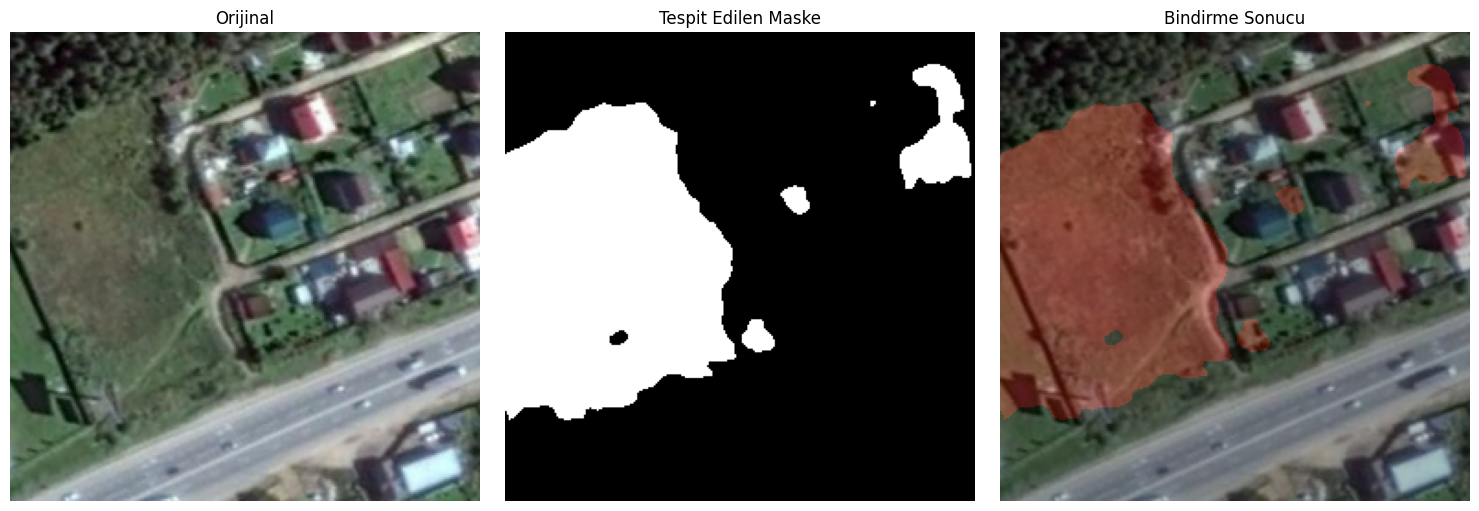

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(original)
axs[0].set_title("Orijinal")
axs[0].axis("off")

axs[1].imshow(mask, cmap='gray')
axs[1].set_title("Tespit Edilen Maske")
axs[1].axis("off")

axs[2].imshow(overlay)
axs[2].set_title("Bindirme Sonucu")
axs[2].axis("off")

plt.tight_layout()
plt.show()


usage: demo_custom.py [-h] [--project_name PROJECT_NAME] [--gpu_ids GPU_IDS]
                      [--checkpoint_root CHECKPOINT_ROOT]
                      [--output_folder OUTPUT_FOLDER] --img1_path IMG1_PATH
                      --img2_path IMG2_PATH [--img_size IMG_SIZE]
                      [--n_class N_CLASS] [--net_G NET_G]
                      [--checkpoint_name CHECKPOINT_NAME]
demo_custom.py: error: the following arguments are required: --img1_path, --img2_path
